# 1. Loading Model for Inference

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

from pathlib import Path

model_file_path = Path("rsna-atd.keras")

model = tf.keras.models.load_model(
    model_file_path, custom_objects={"KerasLayer": hub.KerasLayer}
)

# 2. Train Set Statistics

In [53]:
import pandas as pd

from matplotlib import pyplot as plt
from typing import List

def df_summary(
    df,
    columns: List[str],
    title="Summary",
    describe=True,
    value_counts=False,
    proportions=True,
    head=True,
    histogram=True,
):
    # 1. Show dataframe summary
    if describe:
        print("\n", df.describe())
    if value_counts:
        print("\n", df.value_counts(subset=columns))

    # 2. Show column summary
    if proportions:
        for column in columns:
            col_df = df[column]
            col_stats = pd.DataFrame(columns=['count', 'normalized_count'])
            col_stats['count'] = col_df.value_counts()
            col_stats['normalized_count'] = col_df.value_counts(normalize=True)
            print("\n", col_stats)

    # 3. Show dataframe sample
    if head:
        try:
            display(df.head(20))
        except Exception as e:
            print(f'{e=}')
            print(df.head(20))

    # 4. Show a histogram
    if histogram:
        fig = plt.figure(layout="constrained")
        df.hist(ax=fig.gca(), column=columns)
        fig.suptitle(title)


Train Data Statistics
---------------------

          patient_id  bowel_injury  extravasation_injury  kidney_low  \
count    332.000000    332.000000            332.000000  332.000000   
mean   12324.846386      0.036145              0.072289    0.039157   
std     3439.814061      0.186932              0.259357    0.194260   
min      122.000000      0.000000              0.000000    0.000000   
25%    11220.750000      0.000000              0.000000    0.000000   
50%    12940.500000      0.000000              0.000000    0.000000   
75%    14676.500000      0.000000              0.000000    0.000000   
max    16090.000000      1.000000              1.000000    1.000000   

       kidney_high   liver_low  liver_high  spleen_low  spleen_high  
count   332.000000  332.000000  332.000000  332.000000   332.000000  
mean      0.024096    0.072289    0.015060    0.084337     0.045181  
std       0.153580    0.259357    0.121976    0.278313     0.208014  
min       0.000000    0.000000   

,patient_id,bowel_injury,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,spleen_low,spleen_high
0,10004,0,1,1,0,0,0,0,1
1,10005,0,0,0,0,0,0,0,0
2,10007,0,0,0,0,0,0,0,0
3,10026,0,0,0,0,0,0,0,0
4,10051,0,0,0,0,0,0,1,0
5,10065,1,0,0,0,0,0,0,0
6,10082,0,0,0,0,0,0,0,0
7,10104,0,0,0,0,0,0,0,0
8,10105,0,0,0,0,0,0,0,0
9,10124,0,0,0,0,0,0,0,0


/var/folders/8y/5694n0_n42j4fmg6d5j411480000gn/T/ipykernel_2257/346701388.py:42: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig.gca(), column=columns)


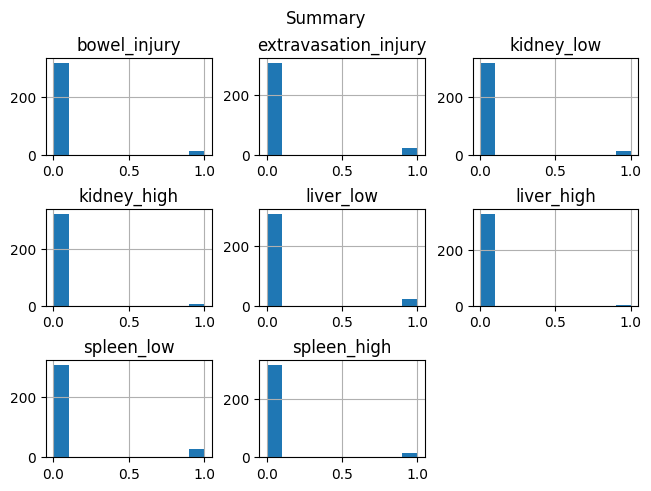

In [62]:
from pathlib import Path
from typing import List

train_csv_file_path = Path('train_samples.csv')
# train_csv_file_path = Path('train.csv')

train_df = pd.read_csv(train_csv_file_path)

TARGET_COLS  = [
    "bowel_injury", "extravasation_injury",
    # "kidney_healthy", "kidney_low", "kidney_high",
    # "liver_healthy", "liver_low", "liver_high",
    # "spleen_healthy", "spleen_low", "spleen_high",
    "kidney_low", "kidney_high",
    "liver_low", "liver_high",
    "spleen_low", "spleen_high",
    # 'extravasation_healthy', 'extravasation_injury'
]

print('\nTrain Data Statistics')
print('---------------------')
df_summary(train_df, columns = TARGET_COLS)

# 3. Explore DICOM

(Dataset.file_meta -------------------------------
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.2.123.12345.1.2.3.10004.1.1000
 (0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
 (0002, 0012) Implementation Class UID            UI: 1.2.3.123456.4.5.1234.1.12.0
 (0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.0'
 -------------------------------------------------
 (0008, 0018) SOP Instance UID                    UI: 1.2.123.12345.1.2.3.10004.1.1000
 (0008, 0023) Content Date                        DA: '20230721'
 (0008, 0033) Content Time                        TM: '232531.265856'
 (0010, 0020) Patient ID                          LO: '10004'
 (0018, 0050) Slice Thickness                     DS: '1.0'
 (0018, 0060) KVP                                 DS: '90.0'
 (0018, 5100) Patient Position                   

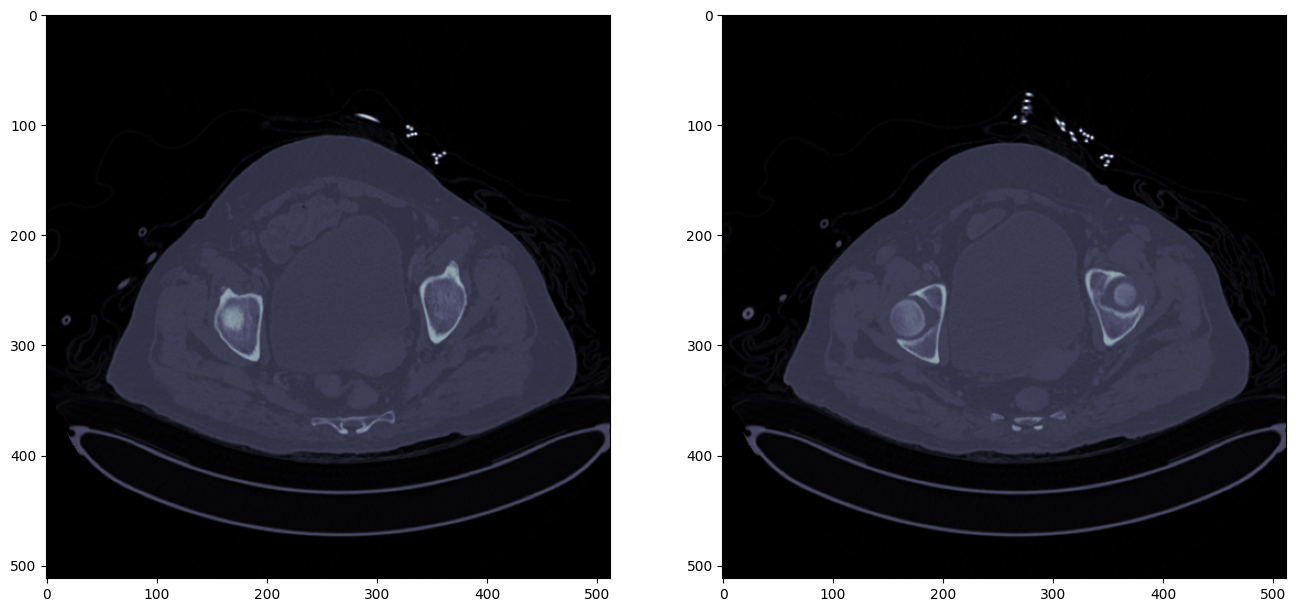

In [68]:
import pydicom

from pathlib import Path
from matplotlib import pyplot as plt

dcm_1000_file_path = Path('1000.dcm')
dcm_1020_file_path = Path('1020.dcm')

dcm_1000 = pydicom.dcmread(dcm_1000_file_path)
dcm_1020 = pydicom.dcmread(dcm_1020_file_path)

_, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(dcm_1000.pixel_array, cmap=plt.cm.bone)
axes[1].imshow(dcm_1020.pixel_array, cmap=plt.cm.bone)

dcm_1000, dcm_1020

# 3. Submission Statistics

Submission: [submission_5]
---------------------

               count  normalized_count
bowel_injury                         
0               302          0.909639
1                30          0.090361

                       count  normalized_count
extravasation_injury                         
1                       330          0.993976
0                         2          0.006024

             count  normalized_count
kidney_low                         
0             332               1.0

              count  normalized_count
kidney_high                         
0              332               1.0

            count  normalized_count
liver_low                         
0            331          0.996988
1              1          0.003012

             count  normalized_count
liver_high                         
0             332               1.0

             count  normalized_count
spleen_low                         
0             332               1.0

              count  norm

,patient_id,bowel_injury,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,spleen_low,spleen_high
0,10004,0,1,0,0,0,0,0,1
1,10005,0,1,0,0,0,0,0,0
2,10007,0,1,0,0,0,0,0,0
3,10026,0,1,0,0,0,0,0,0
4,10051,0,1,0,0,0,0,0,0
5,10065,0,1,0,0,0,0,0,0
6,10082,0,1,0,0,0,0,0,0
7,10104,0,1,0,0,0,0,0,0
8,10105,0,1,0,0,0,0,0,0
9,10124,0,1,0,0,0,0,0,0


/var/folders/8y/5694n0_n42j4fmg6d5j411480000gn/T/ipykernel_2257/346701388.py:42: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig.gca(), column=columns)


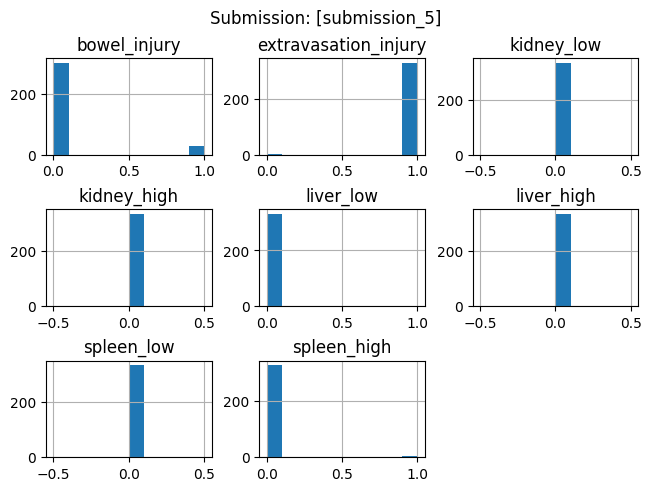

In [63]:
submission_csv_file_paths = [
    Path('submission_5.csv'),
]

submission_dfs = dict(map(
    lambda p: (p.stem, pd.read_csv(p)),
    submission_csv_file_paths
))

for name, df in submission_dfs.items():
    print(
        f'Submission: [{name}]'
        '\n---------------------'
    )
    
    new_df = df[['patient_id'] + TARGET_COLS].copy()
    new_df[TARGET_COLS] = new_df[TARGET_COLS].apply(lambda v: v > 0.5)
    new_df[TARGET_COLS] = new_df[TARGET_COLS].astype('int')
    df_summary(new_df, columns=TARGET_COLS, title=f'Submission: [{name}]', describe=False)

# 3. Compare Results

In [64]:
def evaluate_performance(
    train_df, pred_df, name: str = "submission", summarize_train: bool = False
):
    # 1. Filter train_df for the patients in sub_df
    match_ids = train_df.patient_id.isin(pred_df.patient_id)
    train_filtered_df = train_df[match_ids]

    # 2. Get the list of columns other than patient_id
    columns = list(train_filtered_df.columns)
    columns.remove("patient_id")

    # 3. Summarize filtered train set.
    if summarize_train:
        print("\nTrain Set" "\n---------")
        df_summary(train_filtered_df, columns, title="Train Set")

    # 4. Summarize output set.
    print(f"\n{name}" "\n--------------")
    df_summary(pred_df, columns, title=f"{name}", histogram=False)

    merged_df = train_filtered_df.merge(pred_df, on="patient_id")

    for column in columns:
        xy_columns = [f"{column}_x", f"{column}_y"]
        col_df = merged_df[["patient_id"] + xy_columns]
        col_df = col_df.query(f"{column}_x != {column}_y")
        print(f"\n[{name}|{column}] mismatches" "\n--------------------------")
        df_summary(
            col_df,
            xy_columns,
            title=f"[{name}|{column}]",
            describe=False,
            histogram=False,
            proportions=False,
            head=False,
        )
        print(f'Accuracy: {(1. - len(col_df)/len(merged_df))*100:.2f}')


columns = [
    'bowel_injury',
    'extravasation_injury',
    'kidney_low', 'kidney_high',
    'liver_low', 'liver_high',
    'spleen_low', 'spleen_high'
]
columns_with_patient_id = ['patient_id'] + columns

for name, df in submission_dfs.items():
    new_df = df[['patient_id'] + TARGET_COLS].copy()
    new_df[TARGET_COLS] = new_df[TARGET_COLS].apply(lambda v: v > 0.5)
    new_df[TARGET_COLS] = new_df[TARGET_COLS].astype('int')

    evaluate_performance(train_df[columns_with_patient_id], new_df, name)


submission_5
--------------

          patient_id  bowel_injury  extravasation_injury  kidney_low  \
count    332.000000    332.000000            332.000000       332.0   
mean   12324.846386      0.090361              0.993976         0.0   
std     3439.814061      0.287132              0.077498         0.0   
min      122.000000      0.000000              0.000000         0.0   
25%    11220.750000      0.000000              1.000000         0.0   
50%    12940.500000      0.000000              1.000000         0.0   
75%    14676.500000      0.000000              1.000000         0.0   
max    16090.000000      1.000000              1.000000         0.0   

       kidney_high   liver_low  liver_high  spleen_low  spleen_high  
count        332.0  332.000000       332.0       332.0   332.000000  
mean           0.0    0.003012         0.0         0.0     0.012048  
std            0.0    0.054882         0.0         0.0     0.109266  
min            0.0    0.000000         0.0       

,patient_id,bowel_injury,extravasation_injury,kidney_low,kidney_high,liver_low,liver_high,spleen_low,spleen_high
0,10004,0,1,0,0,0,0,0,1
1,10005,0,1,0,0,0,0,0,0
2,10007,0,1,0,0,0,0,0,0
3,10026,0,1,0,0,0,0,0,0
4,10051,0,1,0,0,0,0,0,0
5,10065,0,1,0,0,0,0,0,0
6,10082,0,1,0,0,0,0,0,0
7,10104,0,1,0,0,0,0,0,0
8,10105,0,1,0,0,0,0,0,0
9,10124,0,1,0,0,0,0,0,0



[submission_5|bowel_injury] mismatches
--------------------------
Accuracy: 89.16

[submission_5|extravasation_injury] mismatches
--------------------------
Accuracy: 7.83

[submission_5|kidney_low] mismatches
--------------------------
Accuracy: 96.08

[submission_5|kidney_high] mismatches
--------------------------
Accuracy: 97.59

[submission_5|liver_low] mismatches
--------------------------
Accuracy: 93.07

[submission_5|liver_high] mismatches
--------------------------
Accuracy: 98.49

[submission_5|spleen_low] mismatches
--------------------------
Accuracy: 91.57

[submission_5|spleen_high] mismatches
--------------------------
Accuracy: 94.88


In [470]:
from tensorflow.keras import layers, losses, metrics, optimizers

import tensorflow as tf

### A custom training regime for RSNA Model ###
class CustomModel(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        # 1. Define Loss Functions
        self.bowel_loss_fn = losses.BinaryCrossentropy()
        # self.extra_loss_fn = losses.BinaryCrossentropy()

        # 2. Define Loss Trackers
        self.bowel_loss_tracker = metrics.Mean(name="bowel_loss")
        # self.extra_loss_tracker = metrics.Mean(name="extra_loss")

        # 3. Define Accuracy Trackers
        self.bowel_acc = metrics.MeanAbsoluteError(name="bowel_accuracy")

    # 4. Train Step
    def train_step(self, xy):
        x, y = xy
        # 1. Forward Pass
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)

            bowel_loss = self.bowel_loss_fn(y[0], y_pred[0])

            loss = bowel_loss

        # 2. Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        
        # 3. Backward Pass
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        
        # 4. Update Loss Metrics
        self.bowel_loss_tracker.update_state(bowel_loss)

        # 5. Update Accuracy Metrics
        self.bowel_acc.update_state(y[0], y_pred[0])

        # 6. Return loss and accuracy metrics
        return {
            self.bowel_loss_tracker.name: self.bowel_loss_tracker.result(),
            self.bowel_acc.name: self.bowel_acc.result()
        }


inp = tf.keras.Input((4, 4, 2))
flattened = layers.Flatten()(inp)
bowel = layers.Dense(1, name='bowel')(flattened)
extra = layers.Dense(1, name='extra')(flattened)

model = CustomModel(inp, outputs=[bowel, extra])

model.summary()

Model: "custom_model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_38 (InputLayer)       [(None, 4, 4, 2)]            0         []                            
                                                                                                  
 flatten_15 (Flatten)        (None, 32)                   0         ['input_38[0][0]']            
                                                                                                  
 bowel (Dense)               (None, 1)                    33        ['flatten_15[0][0]']          
                                                                                                  
 extra (Dense)               (None, 1)                    33        ['flatten_15[0][0]']          
                                                                                    

In [133]:
from tensorflow.keras import optimizers, losses


x = tf.random.normal((2, 4, 4, 2))
y1, y2 = tf.random.normal((2, 1)), tf.random.normal((2, 1))

optimizer = optimizers.Adam()
loss = {
    "bowel": losses.BinaryCrossentropy(),
    "extra": losses.BinaryCrossentropy(),
}
metrics = {
    "bowel":["accuracy"],
    "extra":["accuracy"],
}
# model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.compile(optimizer=optimizer, loss=[], metrics=[])
history = model.fit(x, [y1, y2])
print(history.history)

Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


2023-09-18 16:07:27.855822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 292ms/step - bowel_loss: -5.0121 - bowel_accuracy: 0.9287
{'bowel_loss': [-5.01207971572876], 'bowel_accuracy': [0.9286594390869141]}


# 4. Loss Functions

## 4.1. Weighted Binary Crossentropy Loss Function

In [181]:
from tensorflow.keras import losses

class WeightedBinaryCrossentropyLoss(losses.Loss):
    """It computes binary crossentropy losses with weighted positive samples (1s).
    It is useful if the inputs are unbalanced.
    """
    def __init__(self, pos_weight=1., from_logits=False, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.pos_weight = tf.convert_to_tensor(pos_weight, dtype=tf.float32)
        self.from_logits = from_logits
    
    def call(self, y_true, y_pred):
        """It just calls tf.nn.weighted_cross_entropy_with_logits()
        under the hood. The inputs are expected to be compatible with
        tf.nn.weighted_cross_entropy_with_logits()

        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        # 1. Compute BCE loss
        bce_loss = losses.binary_crossentropy(y_true, y_pred, from_logits=self.from_logits)
        assert(bce_loss.shape[0] == y_true.shape[0])
        # tf.print(f'{bce_loss=}')

        # 2. Reshape the BCE loss to (None, 1) for elementwise multiplication with the weights
        bce_loss = tf.expand_dims(bce_loss, axis=-1)

        # 3. Compute weight for positive class
        pos_weight = tf.math.reduce_mean(y_true) if self.pos_weight is None else self.pos_weight

        return (1. - y_true)*bce_loss + y_true*pos_weight*bce_loss

# labels = tf.constant([0., 0, 0.])
# labels = tf.constant([0., 0., 0.])
labels = tf.constant([[1.], [0.], [0.]])
logits = tf.constant([[1.5], [-0.1], [-10.]])


(
tf.math.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(
    labels=labels, logits=logits, pos_weight=tf.constant(2.))).numpy(),

# tf.math.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(
#     labels=labels, logits=logits, pos_weight=tf.constant(0.5))).numpy(),

    tf.math.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    labels=labels, logits=logits)).numpy(),

WeightedBinaryCrossentropyLoss(pos_weight=2.0, from_logits=True)(labels, logits).numpy(),
# WeightedBinaryCrossentropyLoss(pos_weight=tf.constant(1.5))(labels, logits).numpy(),

# WeightedBinaryCrossentropyLoss()(labels, logits).numpy(),
# WeightedBinaryCrossentropyLoss(pos_weight=tf.constant(0.5))(labels, logits).numpy(),
)


bce_loss=<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.0141323e-01, 6.4439666e-01, 4.5417706e-05], dtype=float32)>
[[0.402826458]
 [0.644396663]
 [4.54177061e-05]]


(0.34908962, 0.28195179, 0.3490895)

## 4.2. Weighted Categorical Crossentropy Loss Function

In [498]:
from tensorflow.keras import losses

class WeightedCategoricalCrossentropyLoss(losses.Loss):
    """It computes categorical crossentropy losses with weighted positive samples (1s).
    It is useful if the inputs are unbalanced.
    """
    def __init__(self, class_weight, *args, **kwargs):
        super().__init__(name='weighted_categorical_crossentropy', *args, **kwargs)

        self.class_weight = tf.convert_to_tensor(class_weight, dtype=tf.float32)
    
    def call(self, y_true, y_pred):
        """It computes the loss as follows:
        
            L = -y_true * tf.math.log(y_pred) * self.class_weight

        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        return -y_true * tf.math.log(y_pred) * self.class_weight

y_true = tf.constant([
    [1., 0., 0.],
    [0., 1., 0.],
    [0., 1., 0.] 
])
y_pred = tf.constant([
    [.25, .50, .25],
    [.65, .15, .20],
    [.05, .05, .90],
])

class_weight = tf.constant([1., 2., 2.])
# class_weight = tf.constant(1.)
loss_fn = WeightedCategoricalCrossentropyLoss(class_weight=class_weight, reduction=losses.Reduction.NONE)
loss_fn(y_true, y_pred)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.3862944, 3.79424  , 5.9914646], dtype=float32)>

## 4.3. Binary IoU Loss

In [132]:
from tensorflow.keras import losses

class BinaryIoULoss(losses.Loss):
    """It computes IoU loss for binary labels.
    """
    def __init__(self, pos_weight=None, from_logits=False, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.pos_weight = pos_weight
        self.from_logits = from_logits
    
    def call(self, y_true, y_pred):
        """
            L = 1 - Sum(y_true*y_pred)/Sum(y_true + y_pred - y_true*y_pred)

        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        y_pred = tf.math.sigmoid(y_pred) if self.from_logits else y_pred
        intersection = y_true*y_pred
        union = y_true + y_pred - intersection
        
        return 1 - tf.math.divide_no_nan(tf.math.reduce_sum(intersection), tf.math.reduce_sum(union))

# labels = tf.constant([0., 0, 0.])
# labels = tf.constant([0., 0., 0.])
labels = tf.constant([1.0, 1.0, 1.0])
# logits = tf.constant([1.5, -0.1, -10.])
preds = tf.constant([1.0, 1.0, 1.0])


loss_fn = BinaryIoULoss()
(
    # loss_fn(tf.constant([1.0, 1.0, 1.0]), tf.constant([1.0, 1.0, 1.0])),
    # loss_fn(tf.constant([1.0, 0.0, 0.0]), tf.constant([1.0, 1.0, 1.0])),
    loss_fn(tf.constant([0.0, 0.0, 0.0, 0.0]), tf.constant([1.0, 1.0, 1.0, 0.0])),
)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,)

## 4.4. Categorical IoU Loss

In [ ]:
from tensorflow.keras import losses

class CategoricalIoULoss(losses.Loss):
    """It computes IoU loss for binary labels.
    """
    def __init__(self, pos_weight=None, from_logits=False, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.pos_weight = pos_weight
        self.from_logits = from_logits
    
    def call(self, y_true, y_pred):
        """
            L = 1 - Sum(y_true*y_pred)/Sum(y_true + y_pred - y_true*y_pred)

        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        # y_pred = tf.math.sigmoid(y_pred) if self.from_logits else y_pred
        y_true_pred = y_true*y_pred
        
        return 1 - tf.math.reduce_sum(y_true_pred)/tf.math.reduce_sum(y_true + y_pred - y_true_pred)

## 4.5. Class Balanced Binary Crossentropy

In [161]:
from tensorflow.keras import losses

class CBBinaryCrossentropy(losses.Loss):
    """It class-balanced binary crossentropy.
    """
    def __init__(self, samples_per_class, from_logits=False, beta=0.9999, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.samples_per_class = tf.convert_to_tensor(samples_per_class, dtype=tf.float32)
        self.from_logits = from_logits
        self.beta = beta
        self.weights = self.get_weights()

    def get_weights(self):
        """Computes class weights
            weights = (1.0 - beta) / (1.0 - pow(beta, samples_per_class))
            weights = weights / sum(weights) * N_CLASSES
        Returns:
            tf.Tensor: A float tensor of shape (N_CLASSES, 1)
        """
        effective_num = 1.0 - tf.math.pow(self.beta, self.samples_per_class)
        w = (1.0 - self.beta) / effective_num
        w = w / tf.math.reduce_sum(w) * tf.size(self.samples_per_class, out_type=w.dtype)

        tf.print(f'{self.__class__.__name__}: weights={w}')

        return w
    
    def call(self, y_true, y_pred):
        """Computes element weights based on true labels
        and applies them to the BCE loss.
        
        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        # 1. Compute BCE loss
        bce_loss = losses.binary_crossentropy(y_true, y_pred, from_logits=self.from_logits)
        assert(bce_loss.shape[0] == y_true.shape[0])

        # 2. Reshape the BCE loss to (None, 1) for elementwise multiplication with the weights
        bce_loss = tf.expand_dims(bce_loss, axis=-1)

        # 3. Compute weights for the two classes
        weights = (1. - y_true)*self.weights[0] + y_true*self.weights[1]

        # tf.print(f'{weights=}')
        # tf.print(f'{bce_loss=}')

        return weights * bce_loss

labels = tf.constant([[1.0], [1.0], [1.0]])
# logits = tf.constant([1.5, -0.1, -10.])
preds = tf.constant([[1.0], [1.0], [1.0]])

loss_bc = losses.BinaryCrossentropy()
loss_cb = CBBinaryCrossentropy(samples_per_class=[3649, 9366])
(
    # loss_bc(tf.constant([1.0, 1.0, 1.0]), tf.constant([0.6, 0.2, 0.7])),
    loss_cb(tf.constant([[1.0], [1.0], [0.0]]), tf.constant([[0.6], [0.2], [0.7]])),
)

CBBinaryCrossentropy: weights=[1.3308121 0.6691879]


(<tf.Tensor: shape=(), dtype=float32, numpy=1.0070385>,)

## 4.6. Class Balanced Categorical Crossentropy

In [160]:
from tensorflow.keras import losses

class CBCategoricalCrossentropy(losses.Loss):
    """It class-balanced categorical crossentropy.
    """
    def __init__(self, samples_per_class, from_logits=False, beta=0.9999, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.samples_per_class = tf.convert_to_tensor(samples_per_class, dtype=tf.float32)
        self.from_logits = from_logits
        self.beta = beta
        self.weights = self.get_weights()
        self.epsilon = 0.00001

    def get_weights(self):
        """Computes class weights
            weights = (1.0 - beta) / (1.0 - pow(beta, samples_per_class))
            weights = weights / sum(weights) * N_CLASSES
        Returns:
            tf.Tensor: A float tensor of shape (N_CLASSES, 1)
        """
        effective_num = 1.0 - tf.math.pow(self.beta, self.samples_per_class)
        w = (1.0 - self.beta) / effective_num
        w = w / tf.math.reduce_sum(w) * tf.size(self.samples_per_class, out_type=w.dtype)

        tf.print(f'{self.__class__.__name__}: weights={w}')

        return w
    
    def call(self, y_true, y_pred):
        """Computes element weights based on true labels
        and applies them to the CE loss.
        
        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        # 1. Apply softmax if required
        y_pred = tf.nn.softmax(y_pred) if self.from_logits else y_pred

        # 2. Remove 0s and 1s from predictions to avoid nan values.
        y_pred = tf.clip_by_value(y_pred, self.epsilon, 1. - self.epsilon)
        
        # 3. Compute CE loss
        ce_loss = -y_true*tf.math.log(y_pred)
        assert(ce_loss.shape[0] == y_true.shape[0])

        # tf.print(f'{self.weights=}')
        # tf.print(f'{ce_loss=}')

        return tf.math.reduce_sum(ce_loss*self.weights, axis=-1)

loss_ce = losses.CategoricalCrossentropy()
loss_cb = CBCategoricalCrossentropy(samples_per_class=[1, 2, 1])
(
    # loss_bc(tf.constant([1.0, 1.0, 1.0]), tf.constant([0.6, 0.2, 0.7])),
    loss_cb(
        tf.constant([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 1.0]]),
        tf.constant([[0.0, 0.2, 0.8], [0.0, 0.9, 0.1], [0.6, 0.2, 0.2], [0.6, 0.2, 0.2]]),
    ),
)

CBCategoricalCrossentropy: weights=[1.2 0.6 1.2]


(<tf.Tensor: shape=(), dtype=float32, numpy=4.4353447>,)

# 5. Load Files

In [307]:
label_data = pd.DataFrame([['submission', 1], ['train', 2]], columns=['patient_id', 'id'])
image_data = pd.DataFrame(map(lambda p: (str(p).split('_')[0], str(p)), Path('.').glob('*.csv')), columns=['patient_id', 'image_path'])

# list(map(lambda p: (str(p).split('_')[0], str(p)), Path('.').glob('*.png')))
train_data = label_data.merge(image_data, on='patient_id')

image_data, label_data, train_data

(   patient_id               image_path
 0       1.csv                    1.csv
 1       2.csv                    2.csv
 2  submission   submission_current.csv
 3       train            train_png.csv
 4   train.csv                train.csv
 5  submission  submission_verifier.csv,
    patient_id  id
 0  submission   1
 1       train   2,
    patient_id  id               image_path
 0  submission   1   submission_current.csv
 1  submission   1  submission_verifier.csv
 2       train   2            train_png.csv)

# 5. Model Design

In [357]:
from collections import namedtuple

TrainConfig = namedtuple('TrainConfig', 'epochs trainable lr', defaults=[10, True, 0.001])

class Config:
    SEED = 42
    IMAGE_SIZE = [224, 224]
    AUTOTUNE = tf.data.AUTOTUNE
    
    TARGET_COLS  = [
        "bowel_injury", "extravasation_injury",
        "kidney_healthy", "kidney_low", "kidney_high",
        "liver_healthy", "liver_low", "liver_high",
        "spleen_healthy", "spleen_low", "spleen_high",
    ]
    TARGET_CATEGORIES = ['bowel', 'extra', 'liver', 'kidney', 'spleen']
    
    ## Version: 1
#     PREDICTED_CATEGORIES = ['bowel', 'extra']

    ## Version: 8
    PREDICTED_CATEGORIES = ['extra']
    
    MAX_PATIENT_FRAMES = 20
    
    BATCH_SIZE = 64
    
    TRAIN_CONFIGS = [
        TrainConfig(epochs=3, trainable=False),
        TrainConfig(epochs=7, trainable=True, lr=0.00012),
    ]
    
    VALIDATION_SPLIT = .8

config = Config()

tf.random.set_seed(seed=config.SEED)

In [523]:
import tensorflow_hub as hub

def apply_attention(base_url, inputs, name: str, trainable=False):
    # 1. Apply a base layer to get the encodings
    base = hub.KerasLayer(base_url, trainable=trainable, name=f'{name}_base')
    x = base(inputs)
    
    # 2. Expand the embedding dimension to make it compatible with the attention layer
    x = layers.Lambda(lambda xx: tf.expand_dims(xx, axis=-1))(x)
    
    # 3. Apply attention
    x = layers.Attention()([x, x])
    
    # 4. Squeeze out the embedding dimension
    x = layers.Lambda(lambda xx: tf.squeeze(xx, axis=-1))(x)
    
    # 5. Prediction head
    output = tf.keras.Sequential(
        [
            layers.Dense(32, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(1),
        ],
        name=name
    )(x)
    
    return output
    
def build_model(base_url, train_config):
    # 1. Define Input
    inputs = tf.keras.Input(shape=config.IMAGE_SIZE + [3,], batch_size=config.BATCH_SIZE)
    
    # 2. Apply Backbone
    ## Version: 1
#     backbone = hub.KerasLayer(
#         model_url,
#         trainable=True,
#     )
#     x = backbone(inputs)
    ## Version: 7
    x = inputs
    
    # 3. Apply prediction heads
    out_bowel = tf.keras.Sequential(
        [
            ## Version: 7
            hub.KerasLayer(base_url, trainable=train_config.trainable),
            
            ## Version: 1
            layers.Dense(64, activation='relu'),
            
#             ## Version: 2
#             layers.Dense(32, activation='relu'),
            
            ## Version: 4
#             layers.Dense(16, activation='relu'),
            
            layers.Dense(1, name='bowel')
        ],
        name='bowel'
    )(x)
    
    # Version: 1
    out_extra = tf.keras.Sequential(
        [
            ## Version: 7
            hub.KerasLayer(base_url, trainable=False),
            ## Version: 1
#             layers.Dense(64, activation='relu'),
            
            ## Version: 3
#             layers.Dense(32, activation='relu'),
            
            ## Version: 4
#             layers.Dense(32, activation='relu'),
#             layers.Dense(8, activation='relu'),
#             layers.Dense(32, activation='relu'),
            
            ## Version: 7
            layers.Dense(128, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(512, activation='relu'),
            
            layers.Dense(1, name='extra')
        ],
        name='extra'
    )(x)

    ## Version: 8
    out_extra = apply_attention(base_url, x, name='extra', trainable=train_config.trainable)
    
    out_kidney = tf.keras.Sequential(
        [
            layers.Dense(256, activation='relu'),
            layers.Dense(3, name='kidney')
        ],
        name='kidney'
    )(x)
    
    out_liver = tf.keras.Sequential(
        [
            layers.Dense(256, activation='relu'),
            layers.Dense(3, name='liver')
        ],
        name='liver'
    )(x)
    
    out_spleen = tf.keras.Sequential(
        [
            layers.Dense(256, activation='relu'),
            layers.Dense(3, name='spleen')
        ],
        name='spleen'
    )(x)

    # 4. Concatenate the outputs
    outputs = [out_bowel, out_extra, out_kidney, out_liver, out_spleen]

    # 5. Create model
    print("[INFO] Building the model...")
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # 6. Define an optimizer
    ## Version: 1
    optimizer = optimizers.Adam(learning_rate=train_config.lr)
    
    ## Version: 4
#     optimizer = optimizers.legacy.SGD(learning_rate=train_config.lr, momentum=0.9)
    
    # 7. Define loss functions
    loss = {
        ## Version: 1
#         'bowel': WeightedBinaryCrossentropyLoss(),
        'extra': WeightedBinaryCrossentropyLoss(),
    }
    
    # 8. Define evaluation metrics
    metrics = {
        ## Version: 1
#         "bowel":["accuracy"],
        "extra":["accuracy"],
#         "liver":["accuracy"],
#         "kidney":["accuracy"],
#         "spleen":["accuracy"],
    }
    
    print("[INFO] Compiling the model...")
    # 9. Compile model
    run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics,
        options=run_opts
    )
    
    return model

model_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2'


model = build_model(model_url, config.TRAIN_CONFIGS[0])
model.summary()


model.fit(ds)

model.save("rsna-atd.keras")

[INFO] Building the model...
[INFO] Compiling the model...


AttributeError: module 'tensorflow' has no attribute 'RunOptions'

In [ ]:
num_elements = 5
images = tf.random.uniform((num_elements, *config.IMAGE_SIZE, 3))
labels = [
    tf.random.uniform((num_elements, 1)),
    tf.random.uniform((num_elements, 1)),
    tf.random.uniform((num_elements, 3)),
    tf.random.uniform((num_elements, 3)),
    tf.random.uniform((num_elements, 3)),
]

def make_element(x, index):
    return x, (2., 2., [1., 1., 1.], [1., 1., 1.], [1., 1., 1.])

ds = tf.data.Dataset.from_tensor_slices((images, tf.range(num_elements))).map(make_element).batch(2)

In [393]:
# model_1 = build_model(model_url, config.TRAIN_CONFIGS[1])
# model_1.summary()

# def total_trainable_weights(m):
#     return tf.math.reduce_sum(list(map(lambda x: tf.size(x), m.trainable_weights)))

# print(f'Total Trainable Weights: {total_trainable_weights(model)}')

# model_1.set_weights(model.get_weights())

# print(f'Total Trainable Weights: {total_trainable_weights(model_1)}')

# model.save("rsna-atd.keras")

No such layer: extra_base1. Existing layers are: ['input_33', 'extra_base', 'lambda_14', 'attention_7', 'lambda_15', 'bowel', 'extra', 'kidney', 'liver', 'spleen'].


# 6. Model Inference

In [402]:
from tensorflow.keras import losses

class WeightedBinaryCrossentropyLoss(losses.Loss):
    """It computes binary crossentropy losses with weighted positive samples (1s).
    It is useful if the inputs are unbalanced.
    """
    def call(self, y_true, y_pred):
        """It just calls tf.nn.weighted_cross_entropy_with_logits()
        under the hood. The inputs are expected to be compatible with
        tf.nn.weighted_cross_entropy_with_logits()

        Args:
            y_true (tf.Tensor): A tensor of true labels.
            y_pred (tf.Tensor): A tensor of logits.
        """
        # Compute total positive and negative samples
        positives = tf.math.reduce_sum(y_true)
        items = tf.cast(tf.size(y_true), dtype=tf.float32)
        negatives = items - positives

        pos_weight = tf.cond(
            tf.math.logical_or(positives == 0., negatives == 0.),
            lambda: 1.,
            lambda: negatives / positives,
        )

        return tf.nn.weighted_cross_entropy_with_logits(
            y_true,
            y_pred,
            pos_weight
        )

model = tf.keras.models.load_model(
        'rsna-atd.keras',
        custom_objects={
            'KerasLayer': hub.KerasLayer,
            'WeightedBinaryCrossentropyLoss': WeightedBinaryCrossentropyLoss
        }
    )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(64, 224, 224, 3)]          0         []                            
                                                                                                  
 bowel (Sequential)          (None, 1)                    6001361   ['input_1[0][0]']             
                                                                                                  
 extra (Sequential)          (None, 1)                    6247505   ['input_1[0][0]']             
                                                                                                  
 kidney (Sequential)         (None, 224, 224, 3)          1795      ['input_1[0][0]']             
                                                                                              

In [403]:
predictions = model(tf.random.uniform((2, *config.IMAGE_SIZE, 3)))

2023-09-23 15:21:50.057304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-23 15:21:51.056133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# 7. Metrics

In [463]:

num_elements = 5
y_true = tf.constant([1., 0., 1., 1.])
# y_pred = tf.constant([1., 1., 1., 0.])
y_pred = tf.constant([.2, .8, .1, .2])

# precision = tf.keras.metrics.Precision(thresholds=0)
# precision.update_state(y_true, y_pred)
# precision.true_positives, precision.false_positives, tf.math.sigmoid(y_pred), precision.result()

# recall = tf.keras.metrics.Recall()
# recall = tf.keras.metrics.Recall(thresholds=0)
# recall.update_state(y_true, y_pred)
# recall.true_positives, recall.false_negatives, tf.math.sigmoid(y_pred), recall.result()

iou = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1])
iou.update_state(y_true, y_pred)
tf.math.sigmoid(y_pred), iou.result()


(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.549834 , 0.6899745, 0.5249792, 0.549834 ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

# 8. Run Metrics

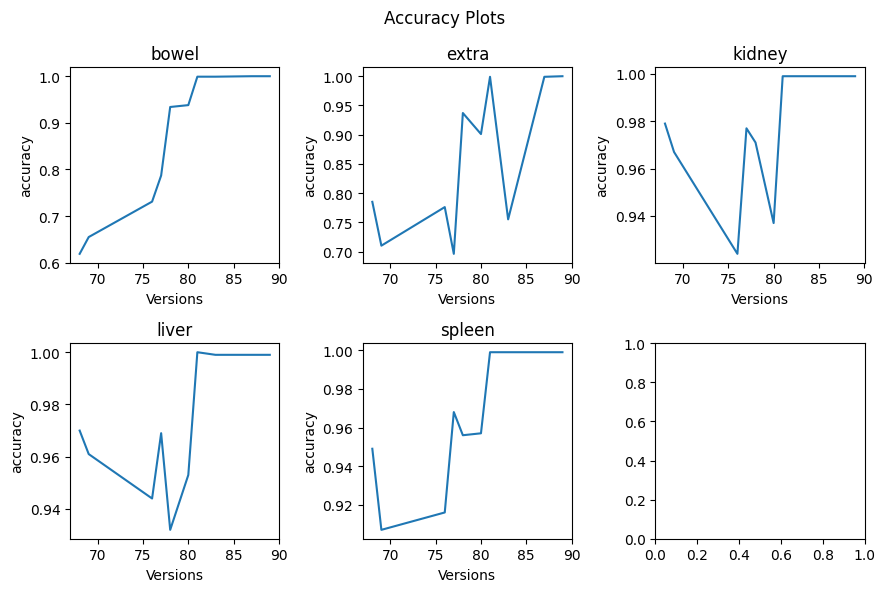

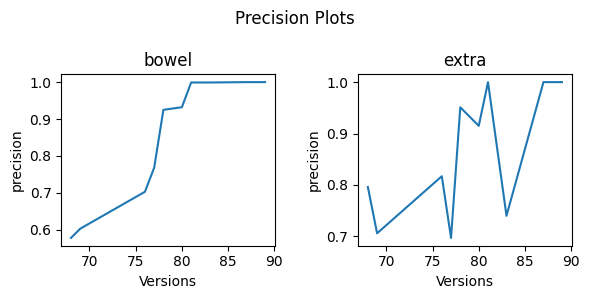

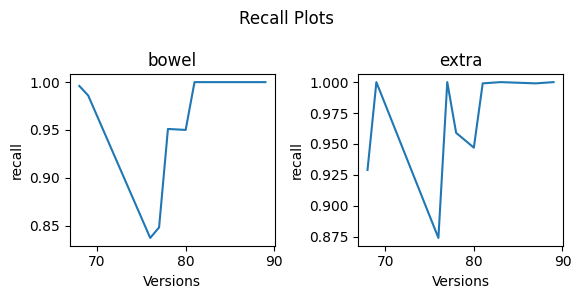

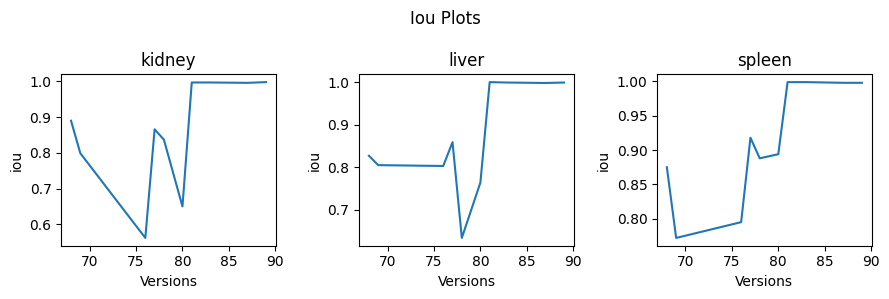

versions=[68, 69, 76, 77, 78, 80, 81, 83, 87, 89]
{'accuracy': {'bowel': [0.619, 0.655, 0.731, 0.787, 0.934, 0.938, 0.999, 0.999, 1.0, 1.0], 'extra': [0.785, 0.71, 0.776, 0.696, 0.937, 0.901, 0.999, 0.755, 0.999, 1.0], 'kidney': [0.979, 0.967, 0.924, 0.977, 0.971, 0.937, 0.999, 0.999, 0.999, 0.999], 'liver': [0.97, 0.961, 0.944, 0.969, 0.932, 0.953, 1.0, 0.999, 0.999, 0.999], 'spleen': [0.949, 0.907, 0.916, 0.968, 0.956, 0.957, 0.999, 0.999, 0.999, 0.999]}, 'precision': {'bowel': [0.578, 0.603, 0.703, 0.768, 0.925, 0.932, 0.999, 0.999, 1.0, 1.0], 'extra': [0.796, 0.706, 0.817, 0.697, 0.951, 0.915, 1.0, 0.74, 1.0, 1.0]}, 'recall': {'bowel': [0.996, 0.986, 0.837, 0.848, 0.951, 0.95, 1.0, 1.0, 1.0, 1.0], 'extra': [0.929, 1.0, 0.874, 1.0, 0.959, 0.947, 0.999, 1.0, 0.999, 1.0]}, 'iou': {'kidney': [0.89, 0.799, 0.562, 0.866, 0.837, 0.65, 0.997, 0.997, 0.996, 0.998], 'liver': [0.827, 0.805, 0.803, 0.859, 0.634, 0.764, 1.0, 0.999, 0.998, 0.999], 'spleen': [0.875, 0.772, 0.795, 0.918, 0.888, 0.

In [182]:
from matplotlib import pyplot as plt


def plot_version_metrics(versions, data, metric="accuracy", cols=3):
    # 1. Construct a list of outputs for the given metric
    outputs = list(data.keys())

    # 2. Create a 3x2 grid for the subplots
    rows = max(1, (len(outputs) + cols - 1) // cols)
    cols = min(len(outputs), cols)
    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))

    # 3. Flatten axes to iterate through them
    axes = axes.flatten()

    # 4. Iterate over the outputs and plot them individually
    for i, output in enumerate(outputs):
        # 5. Plot metrics for the output
        axes[i].plot(versions, data[output], label=output)

        # 7. Decorate axes
        axes[i].set_title(output)
        axes[i].set_xlabel("Versions")
        axes[i].set_ylabel(metric)

    # 7. Show the plot
    plt.suptitle(f"{metric.capitalize()} Plots")
    plt.tight_layout()
    plt.show()


versions = [68, 69, 76, 77, 78, 80, 81, 83, 87, 89]
best_epochs = [14, 14, 14, 14, 14, 14, 14, 13, 14, 11]
version_metrics = {
    "accuracy": {
        "bowel": [0.619, 0.655, 0.731, 0.787, 0.934, 0.938, 0.999, 0.999, 1.0, 1.0],
        "extra": [0.785, 0.71, 0.776, 0.696, 0.937, 0.901, 0.999, 0.755, 0.999, 1.0],
        "kidney": [
            0.979,
            0.967,
            0.924,
            0.977,
            0.971,
            0.937,
            0.999,
            0.999,
            0.999,
            0.999,
        ],
        "liver": [0.97, 0.961, 0.944, 0.969, 0.932, 0.953, 1.0, 0.999, 0.999, 0.999],
        "spleen": [
            0.949,
            0.907,
            0.916,
            0.968,
            0.956,
            0.957,
            0.999,
            0.999,
            0.999,
            0.999,
        ],
    },
    "precision": {
        "bowel": [0.578, 0.603, 0.703, 0.768, 0.925, 0.932, 0.999, 0.999, 1.0, 1.0],
        "extra": [0.796, 0.706, 0.817, 0.697, 0.951, 0.915, 1.0, 0.74, 1.0, 1.0],
    },
    "recall": {
        "bowel": [0.996, 0.986, 0.837, 0.848, 0.951, 0.95, 1.0, 1.0, 1.0, 1.0],
        "extra": [0.929, 1.0, 0.874, 1.0, 0.959, 0.947, 0.999, 1.0, 0.999, 1.0],
    },
    "iou": {
        "kidney": [0.89, 0.799, 0.562, 0.866, 0.837, 0.65, 0.997, 0.997, 0.996, 0.998],
        "liver": [0.827, 0.805, 0.803, 0.859, 0.634, 0.764, 1.0, 0.999, 0.998, 0.999],
        "spleen": [
            0.875,
            0.772,
            0.795,
            0.918,
            0.888,
            0.894,
            0.999,
            0.999,
            0.998,
            0.998,
        ],
    },
}

for metric, data in version_metrics.items():
    plot_version_metrics(versions=versions, data=data, metric=metric)

print(f"{versions=}")
print(version_metrics)

# 9. WANDB

In [17]:
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: nareshps (doiml). Use `wandb login --relogin` to force relogin


True

In [19]:
wandb.init(
    project="basic-intro", 
    config={
        "learning_rate": 0.02,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": 10,
    })

wandb.log({"acc": 1.0, "loss": 1.9})

wandb.finish()

acc,▁
loss,▁
acc,1.0
loss,1.9
